In [8]:
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import models
from PIL import Image

# http://www.gisdeveloper.co.kr/?p=8498

vgg = models.vgg16(pretrained=True).cpu()
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

torch.Size([1, 3, 224, 224])


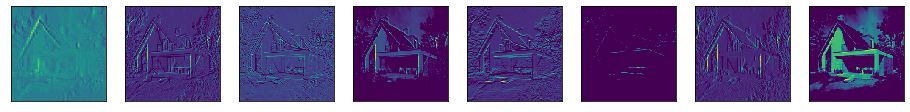

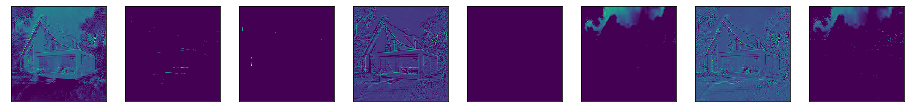

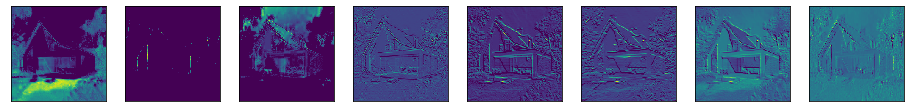

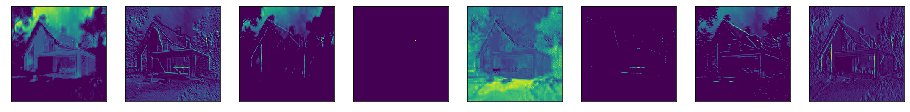

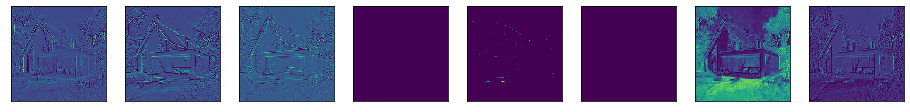

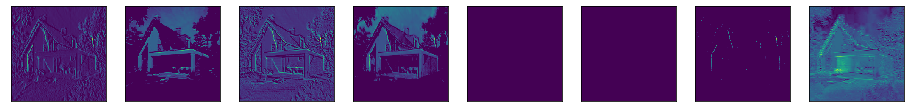

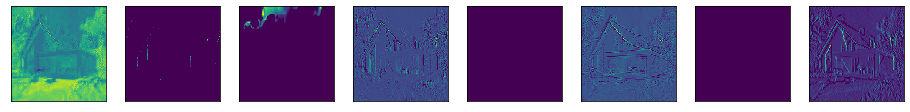

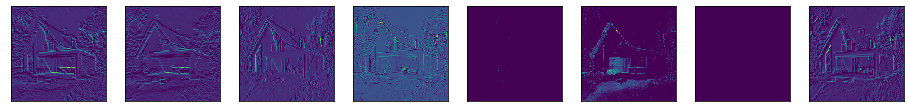

In [31]:
# cuda = True if torch.cuda.is_available() else False
    
class LayerResult:
    def __init__(self, payers, layer_index):
        self.hook = payers[layer_index].register_forward_hook(self.hook_fn)
    
    def hook_fn(self, module, input, output):
        self.features = output.cpu().data.numpy()
    
    def unregister_forward_hook(self):
        self.hook.remove()

result = LayerResult(vgg.features, 0)
img = Image.open(r'D:\GANder\T_scrap\7.png')
img = img.resize((224,224))

# img = transforms.Resize(256)(img)
# img = transforms.CenterCrop(224)(img)
img = transforms.ToTensor()(img).unsqueeze(0)

vgg(img.cpu())
activations = result.features


"""PLot images in one row."""
for j in range(8):
    n = 8
    plt.figure(figsize=(16, 6))
    for i in range(8):
        image = activations[0][i+(j*8)]
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
    plt.show()